In [121]:
import pandas as pd
import numpy as np
import lasio

las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/7_1-1.las')
df = las.df()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 17982 entries, 82.600799561 to 2815.7127996
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  16241 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   16242 non-null  float64
 2   CALI                               16270 non-null  float64
 3   BS                                 17947 non-null  float64
 4   DCAL                               16272 non-null  float64
 5   MUDWEIGHT                          15724 non-null  float64
 6   ROP                                17343 non-null  float64
 7   RDEP                               16121 non-null  float64
 8   RSHA                               16115 non-null  float64
 9   RMED                               16152 non-null  float64
 10  SP                                 16151 non-null  float64
 11  DTC                               

In [122]:
las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/35_4-1.las')
df = las.df()
df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'BS', 'ROP', 'RDEP', 'RMED', 'DTS', 'DTC', 'NPHI', 'PEF', 'GR',
       'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

In [123]:
log_curves = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTS', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']

for curve in log_curves:
    if curve not in df.columns:
        df[curve] = 0

X = df.fillna(0)
X = X[log_curves]
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = X.fillna(0)


In [124]:
X

,CALI,BS,DCAL,ROP,RDEP,RSHA,RMED,SP,DTS,DTC,NPHI,GR,RHOB,DRHO
DEPT,,,,,,,,,,,,,,
403.604,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.685957
403.756,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897596,0.000000,0.0,0.685957
403.908,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857792,0.000000,0.0,0.685957
404.060,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791115,0.000000,0.0,0.685957
404.212,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.817098,0.000000,0.0,0.685957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957.828,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.382298,0.0,0.685957
4957.980,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.384776,0.0,0.685957
4958.132,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.377819,0.0,0.685957


D: The number of depth points.

N: The number of logging curves (features).
data: The values of the selected logging curves (logging_curves) from the DataFrame (X) converted into a NumPy array.

input_tensor: Reshaped tensor with dimensions (D, 1, N)

values along the x-axis correspond to the different logging curves, and the values along the y-axis correspond to the depth points.

In [125]:
# Reshape the DataFrame - 3D tensor
from PIL import Image

D = len(X.index.values)
N = len(X.columns)
data = X.to_numpy()
input_tensor = np.reshape(data, (D, 1, N))

# Normalize the input tensor
mean = np.mean(data)
std = np.std(data)
input_tensor = (data - mean) / std

# Reshape the input tensor
input_tensor = np.reshape(input_tensor, (D, N))

print("Minimum value:", np.min(input_tensor))
print("Maximum value:", np.max(input_tensor))
print("Average value:", np.mean(input_tensor))

# Convert the input tensor to PIL image
image = Image.fromarray(input_tensor.astype(np.uint8), mode='L')
image.save('1d_image_2.png')

Minimum value: -1.0381348164172464
Maximum value: 2.3797685187294952


In [69]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11,
                 12345: 12}

labels = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].fillna(12345).astype(int)

# Map numeric labels to lithology names
y = np.array([lithology_numbers[label] for label in labels])


# Get the total number of depth points (D) and number of lithology classes (C)
D = len(y)
C = len(lithology_numbers)

# Create an empty lithology label image
label_image = np.zeros((D, C), dtype=np.float32)

# Set the corresponding class index to 1 for each depth point
for i in range(D):
    label_image[i, y[i]] = 1

# Convert to PIL image
label_image_pil = Image.fromarray((label_image * 255).astype(np.uint8), mode='L')
label_image_pil.save('label_img.png')

Upon inspecting preprocessed images, some images appear completely black to a naked eye. Therefore, to visualize input images, we can use plt

In [126]:
las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/16_2-6.las')
df1 = las.df()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 13094 entries, 141.01879883 to 2131.1547988
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  9138 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   9138 non-null   float64
 2   CALI                               8968 non-null   float64
 3   BS                                 13094 non-null  float64
 4   ROPA                               13084 non-null  float64
 5   ROP                                13093 non-null  float64
 6   RDEP                               13079 non-null  float64
 7   RMED                               13077 non-null  float64
 8   DTS                                1888 non-null   float64
 9   DTC                                8883 non-null   float64
 10  NPHI                               8921 non-null   float64
 11  PEF                               

In [127]:
df1.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE     3956
FORCE_2020_LITHOFACIES_LITHOLOGY      3956
CALI                                  4126
BS                                       0
ROPA                                    10
ROP                                      1
RDEP                                    15
RMED                                    17
DTS                                  11206
DTC                                   4211
NPHI                                  4173
PEF                                   4270
GR                                       8
RHOB                                  4270
DRHO                                  4151
DEPTH_MD                                15
X_LOC                                   15
Y_LOC                                   15
Z_LOC                                   15
dtype: int64

In [128]:
log_curves = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTS', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']

for curve in log_curves:
    if curve not in df1.columns:
        df1[curve] = 0

X = df1.fillna(0)
X = X[log_curves]
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = X.fillna(0)
X

,CALI,BS,DCAL,ROP,RDEP,RSHA,RMED,SP,DTS,DTC,NPHI,GR,RHOB,DRHO
DEPT,,,,,,,,,,,,,,
141.018799,0.0,0.366667,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.031644,0.0,0.20875
141.170799,0.0,0.366667,0.0,0.779379,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036472,0.0,0.20875
141.322799,0.0,0.366667,0.0,0.641392,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036485,0.0,0.20875
141.474799,0.0,0.366667,0.0,0.551390,0.00576,0.0,0.004416,0.0,0.0,0.0,0.0,0.039873,0.0,0.20875
141.626799,0.0,0.366667,0.0,0.503714,0.00576,0.0,0.004416,0.0,0.0,0.0,0.0,0.046657,0.0,0.20875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130.546799,0.0,0.000000,0.0,0.037088,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.20875
2130.698799,0.0,0.000000,0.0,0.037473,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.20875
2130.850799,0.0,0.000000,0.0,0.038545,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.20875


In [140]:
# Reshape the DataFrame - 3D tensor
from PIL import Image

D = len(X)
N = len(X.columns)
data = X.to_numpy()
input_tensor = np.reshape(data, (D, 1, N))

# Normalize the input tensor
mean = np.mean(data)
std = np.std(data)
input_tensor = (data - mean) / std

# Reshape the input tensor
input_tensor = np.reshape(input_tensor, (D, N))

print("Minimum value:", np.min(input_tensor))
print("Maximum value:", np.max(input_tensor))
print("Average value:", np.mean(input_tensor))


# Convert the input tensor to PIL image
image = Image.fromarray(input_tensor.astype(np.uint8), mode='L')
# image.show()
image.show()

Minimum value: -0.6983648381879464
Maximum value: 2.4970915384668992
Average value: 9.922698529020143e-17



(xviewer:250502): GdkPixbuf-CRITICAL **: 13:29:02.720: gdk_pixbuf_scale_simple: assertion 'dest_width > 0' failed


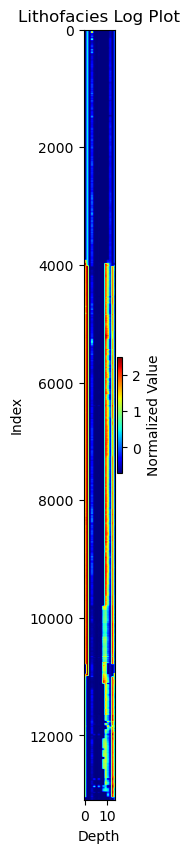

In [139]:
import matplotlib.pyplot as plt

# Create the lithofacies log plot
fig = plt.figure(figsize=(0.5, 10))
plt.imshow(input_tensor, cmap='jet', aspect='auto')

# Set the labels and title
plt.xlabel('Depth')
plt.ylabel('Index')
plt.title('Lithofacies Log Plot')

# Show the colorbar
plt.colorbar(label='Normalized Value')

# Show the plot
plt.show()
